<h3 style='margin: 10px 0px; color: rgb(0, 0, 0); font-family: "Times New Roman"; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; letter-spacing: normal; orphans: 2; text-align: start; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; text-decoration-style: initial; text-decoration-color: initial;'><span style="color: rgb(41, 105, 176);"><strong style="font-weight: 700;"><span style="font-size: 22px;">PROJECT &nbsp;</span></strong><strong><span style="font-size: 22px;">SUPERVISED LEARNING - BANKING DOMAIN</span></strong></span></h3>

<p><span style="font-size: 20px; color: rgb(41, 105, 176);">Import necessary libraries</span></p>

In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#The libraries for statistics,model building and test data split will be loaded where necessary

<p><span style="font-size: 20px; color: rgb(41, 105, 176);">1. Read the column description and ensure you understand each attribute well</span></p>

In [541]:
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [542]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [543]:
bank.shape

(5000, 14)

**The csv file has 5000 rows/observations and 14 columns/attributes.**

In [544]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**The following are the 14 attributes of the given data for each bank customer :  
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']**

In [545]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [546]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**All the given attributes are numerical attributes( integer/floats). However some of them are categorical in nature as we will see below.**

In [547]:
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**There are no null values in given data. However we cannot be sure that all data is valid.There is a possibility of garbage values in the given data.**

<p><span style="color: rgb(40, 50, 78); font-size: 22px;">ID Attribute</span></p>

In [548]:
bank['ID'].max()

5000

**The bank ID attribute is a numerical attribute which has no bearing on the machine learning model we will implement as it has no relation with the target attribute 'Personal Loan'. We will drop this attribute.**

In [549]:
bank.drop('ID',inplace=True,axis=1)

In [550]:
#Checking dropped column ID
bank.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<p><span style="color: rgb(40, 50, 78); font-size: 22px;">AGE Attribute</span></p>

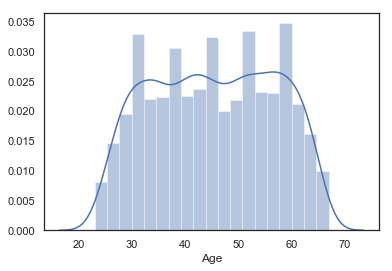

In [452]:
sns.distplot(bank["Age"],kde=True)

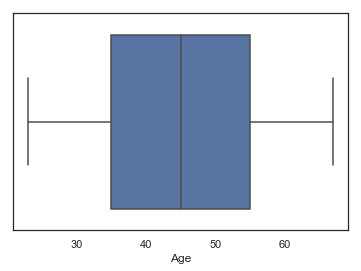

In [551]:
sns.boxplot(x=bank["Age"])

**The age distribution of customers is multivariate in nature. Moreover the box plot suggests no outliers and somewhat uniform distribution of the data points.**

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>Experience Attribute</span></p>

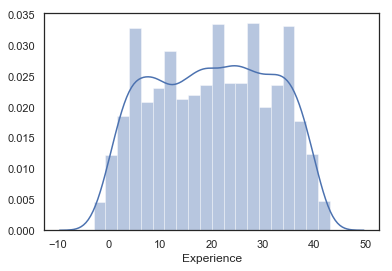

In [552]:
sns.distplot(bank["Experience"],kde=True)

**As we can see that we have some people with negative experience which may be considered garbage value. The number of customers with negative value is 52, which is very low number comapared to total customers 5000. Hence we will drop the rows with negative experince.** 

In [553]:
bank[bank["Experience"]<0].count()

Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [554]:
#We can also replace negative experience with 0 but here we will drop negative values
# bank[bank["Experience"]<0]=0
bank=bank[bank["Experience"] >= 0]

In [555]:
#Checking the dropped rows
bank[bank.Experience<0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [556]:
bank.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


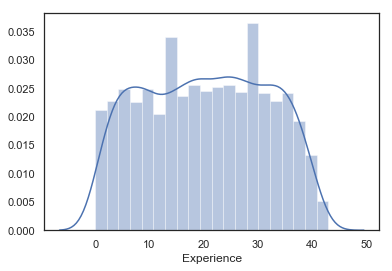

In [557]:
sns.distplot(bank["Experience"],kde=True)

In [558]:
bank.count()

Age                   4948
Experience            4948
Income                4948
ZIP Code              4948
Family                4948
CCAvg                 4948
Education             4948
Mortgage              4948
Personal Loan         4948
Securities Account    4948
CD Account            4948
Online                4948
CreditCard            4948
dtype: int64

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>Income Attribute</span></p>

In [559]:
bank["Income"].describe()

count    4948.000000
mean       73.814470
std        46.112596
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

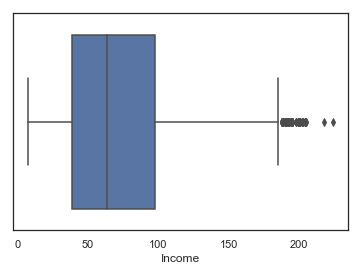

In [560]:
sns.boxplot(x=bank["Income"])

In [561]:
bank["Income"].skew()

0.8420039289292482

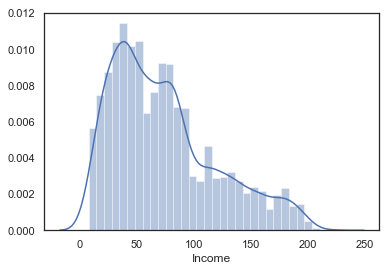

In [562]:
sns.distplot(bank["Income"],kde=True)

**The graph of Income attribute is right skewed with a lot of outliers.Majority of the income is on lower side but some customers have very high Income.**

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>ZIP Code Attribute</span></p>

In [563]:
bank["ZIP Code"].nunique()


467

In [564]:
plt.figure(figsize=(500,80))
sns.countplot(x=bank["ZIP Code"])

**Since there is no direct correlation between Zip code and Personal Loan Attribute we may drop this attribute.**

In [565]:
bank.drop('ZIP Code',axis=1, inplace=True)

In [566]:
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>Family Attribute</span></p>

In [567]:
print(bank["Family"].max())
print(bank["Family"].min())

4
1


**The Family attribute is categorical in nature with max value 4 and min value 1**

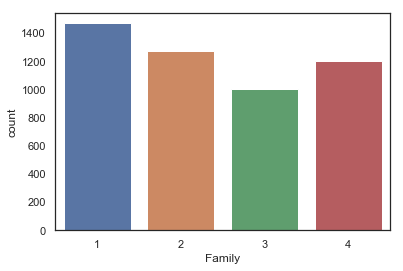

In [568]:
sns.countplot(x=bank["Family"])

In [569]:
bank["Family"].value_counts()

1    1470
2    1274
4    1203
3    1001
Name: Family, dtype: int64

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>CCAvg Attribute</span></p>


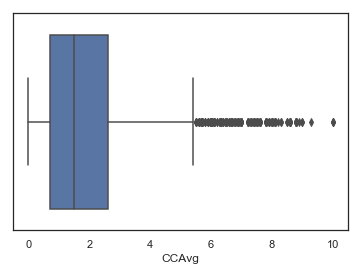

In [570]:
sns.boxplot(bank["CCAvg"])

**While median value for monthly spending is less than two, there are a lot of outliers with monthly credit card spending over 5(all values in '*000')**

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>Education Attribute</span></p>


**This is categorical attribute with 3 valid values**

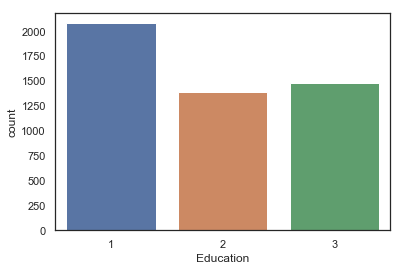

In [571]:
sns.countplot(x=bank["Education"])

In [572]:
bank["Education"].value_counts()

1    2080
3    1481
2    1387
Name: Education, dtype: int64

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>Mortgage Attribute</span></p>

**This is continuous variable.**

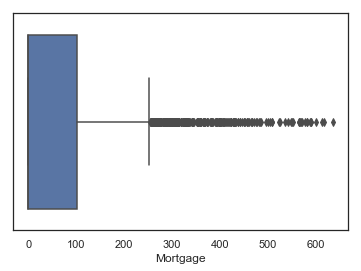

In [573]:
sns.boxplot(x=bank["Mortgage"])
#including mortage=0

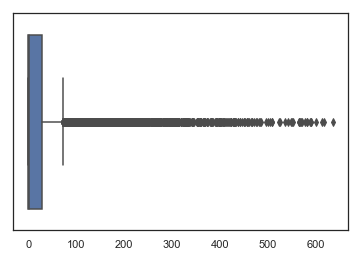

In [574]:
y=bank[bank["Mortgage"]!=0]
sns.boxplot(x=y)
#excluding mortage=0

In [575]:
print(y["Mortgage"].mean())  #excludes people with no mortgage
print(bank["Mortgage"].mean())  #includes people with no mortgage
print(y.count())
print(bank.count())

183.63499344692005
56.63439773645918
Age                   1526
Experience            1526
Income                1526
Family                1526
CCAvg                 1526
Education             1526
Mortgage              1526
Personal Loan         1526
Securities Account    1526
CD Account            1526
Online                1526
CreditCard            1526
dtype: int64
Age                   4948
Experience            4948
Income                4948
Family                4948
CCAvg                 4948
Education             4948
Mortgage              4948
Personal Loan         4948
Securities Account    4948
CD Account            4948
Online                4948
CreditCard            4948
dtype: int64


**The boxplot is highly right skewed and affected by number of people who have taken no mortagages.Less than 1/3rd customers have no mortgages.We will compare pair attributes later such as mortgage vs age , etc.**

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 18px; font-family: "Times New Roman", Times, serif;'>Securities Account Loan Attribute</span></p>

**The Securities Account Loan  Attribute is categorical datatype and has only 2 possibilities ( have this account type or not)**

In [576]:
bank["Securities Account"].value_counts()

0    4432
1     516
Name: Securities Account, dtype: int64

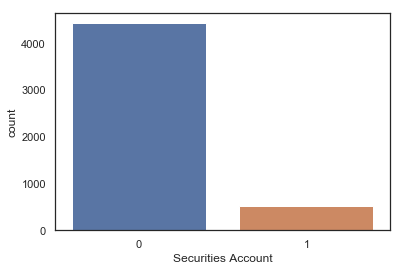

In [577]:
sns.countplot(x=bank["Securities Account"], data=bank)

In [578]:
bank["Securities Account"].value_counts()

0    4432
1     516
Name: Securities Account, dtype: int64

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>CD Account Attribute</span></p>

**The CD Account Attribute is categorical datatype and has only 2 possibilities ( have this account type or not)**

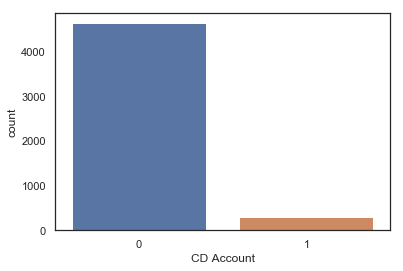

In [579]:
sns.countplot(x=bank["CD Account"], data=bank)

In [580]:
bank["CD Account"].value_counts()

0    4646
1     302
Name: CD Account, dtype: int64

**Only 300 people out of 4634 people have CD Account with the bank**

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>Online Attribute</span></p>

**The Online Attribute is categorical datatype and has only 2 possibilities ( using internet facilities or not using)**

In [581]:
bank["Online"].value_counts()

1    2954
0    1994
Name: Online, dtype: int64

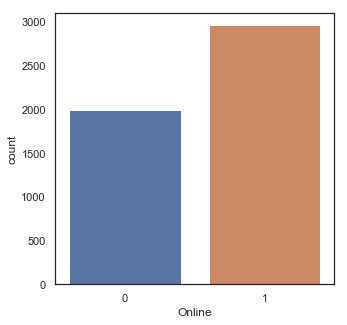

In [582]:
plt.figure(figsize=(5,5))
sns.countplot(x=bank["Online"], data=bank)

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 22px; font-family: "Times New Roman", Times, serif;'>CreditCard Attribute</span></p>

**The CreditCard Attribute is categorical datatype and has only 2 possibilities ( have and have nots)** 

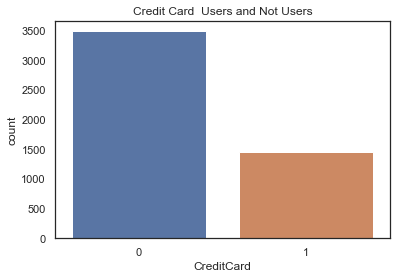

In [586]:
plt.title("Credit Card  Users and Not Users")
sns.countplot(x=bank["CreditCard"], data=bank)
plt.show()

**Evidently only half number of people have credit cards compared to those who dont have a Credit Card.**

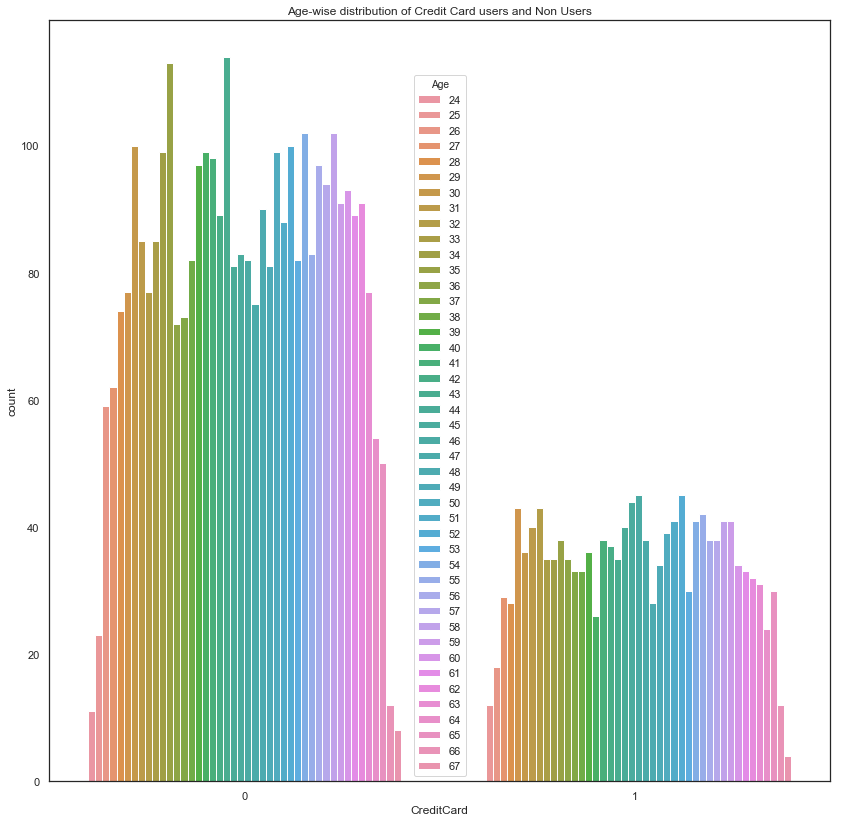

In [587]:
plt.figure(figsize=(14,14))
plt.title("Age-wise distribution of Credit Card users and Non Users")
sns.countplot(x=bank["CreditCard"], data=bank,hue=bank["Age"])
plt.show()

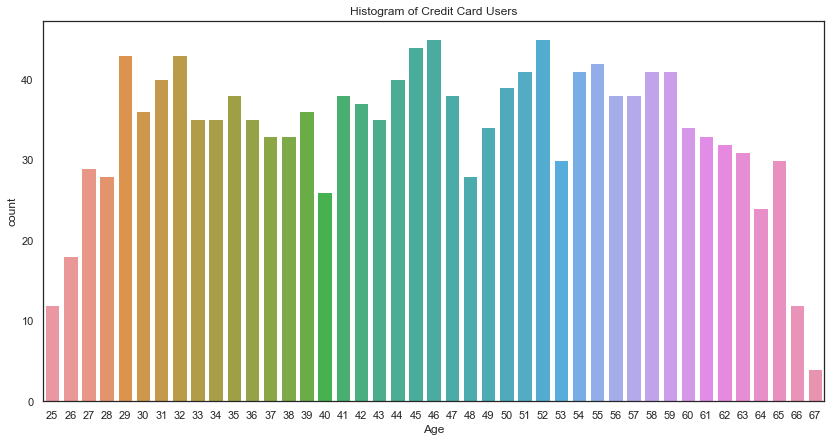

In [585]:
plt.figure(figsize=(14,7))
plt.title("Histogram of Credit Card Users")
cc_yes=bank[bank["CreditCard"]==1]
sns.countplot(x=cc_yes["Age"],data=cc_yes)
plt.show()

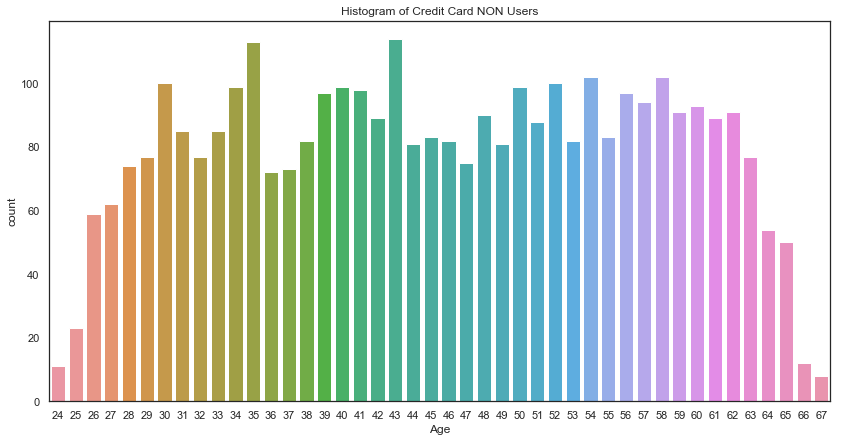

In [488]:
plt.figure(figsize=(14,7))
plt.title("Histogram of Credit Card NON Users")
cc_not=bank[bank["CreditCard"]==0]
sns.countplot(x=cc_not["Age"],data=cc_not)
plt.show()

C:\Users\cools\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


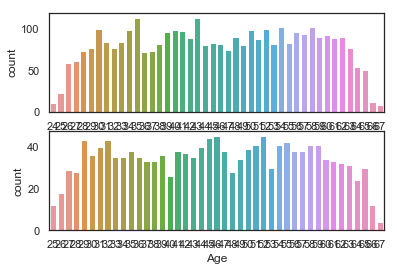

<Figure size 36000x1080 with 0 Axes>

In [489]:
fig, ax =plt.subplots(2,1)
cc_not=bank[bank["CreditCard"]==0]
cc_yes=bank[bank["CreditCard"]==1]
sns.countplot(x=cc_yes["Age"],data=cc_yes,ax=ax[1])
sns.countplot(x=cc_not["Age"],data=cc_not,ax=ax[0])
plt.figure(figsize=(500,15))
fig.show()


**Comparative histogram for Credit card Users/Non Users. No discernible pattern present**

<p><br></p>
<p><span style="color: rgb(0, 0, 0); font-size: 14px;">&#39;ID&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Attribute Dropped&nbsp;</span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;Age&#39;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Categorical</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;Experience&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Non Negative categorical</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;Income&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Continuous/Numerical&nbsp;</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;ZIP Code&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Categorical/Dropped&nbsp;</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;Family&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Categorical</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;CCAvg&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;- Continuous/Numerical&nbsp;</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;Education&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;- Categorical</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;Mortgage&#39;, &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;- Continuous/Numerical&nbsp;</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;Securities Account&#39; &nbsp; &nbsp; - Categorical</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;CD Account&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Categorical</span></span></p>
<p><span style="font-size: 14px;"><span style="color: rgb(0, 0, 0);">&#39;Online&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Categorical</span></span></p>
<p><span style="color: rgb(0, 0, 0); font-size: 14px;">&#39;CreditCard&#39; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; - Categorical</span></p>
<p><br></p>

<p><span style="font-size: 20px; color: rgb(41, 105, 176);">2. Study the data distribution in each attribute, share your findings</span></p>

<p><span style="font-size: 20px; color: rgb(41, 105, 176);">Pair Plots of the given attributes</span></p>

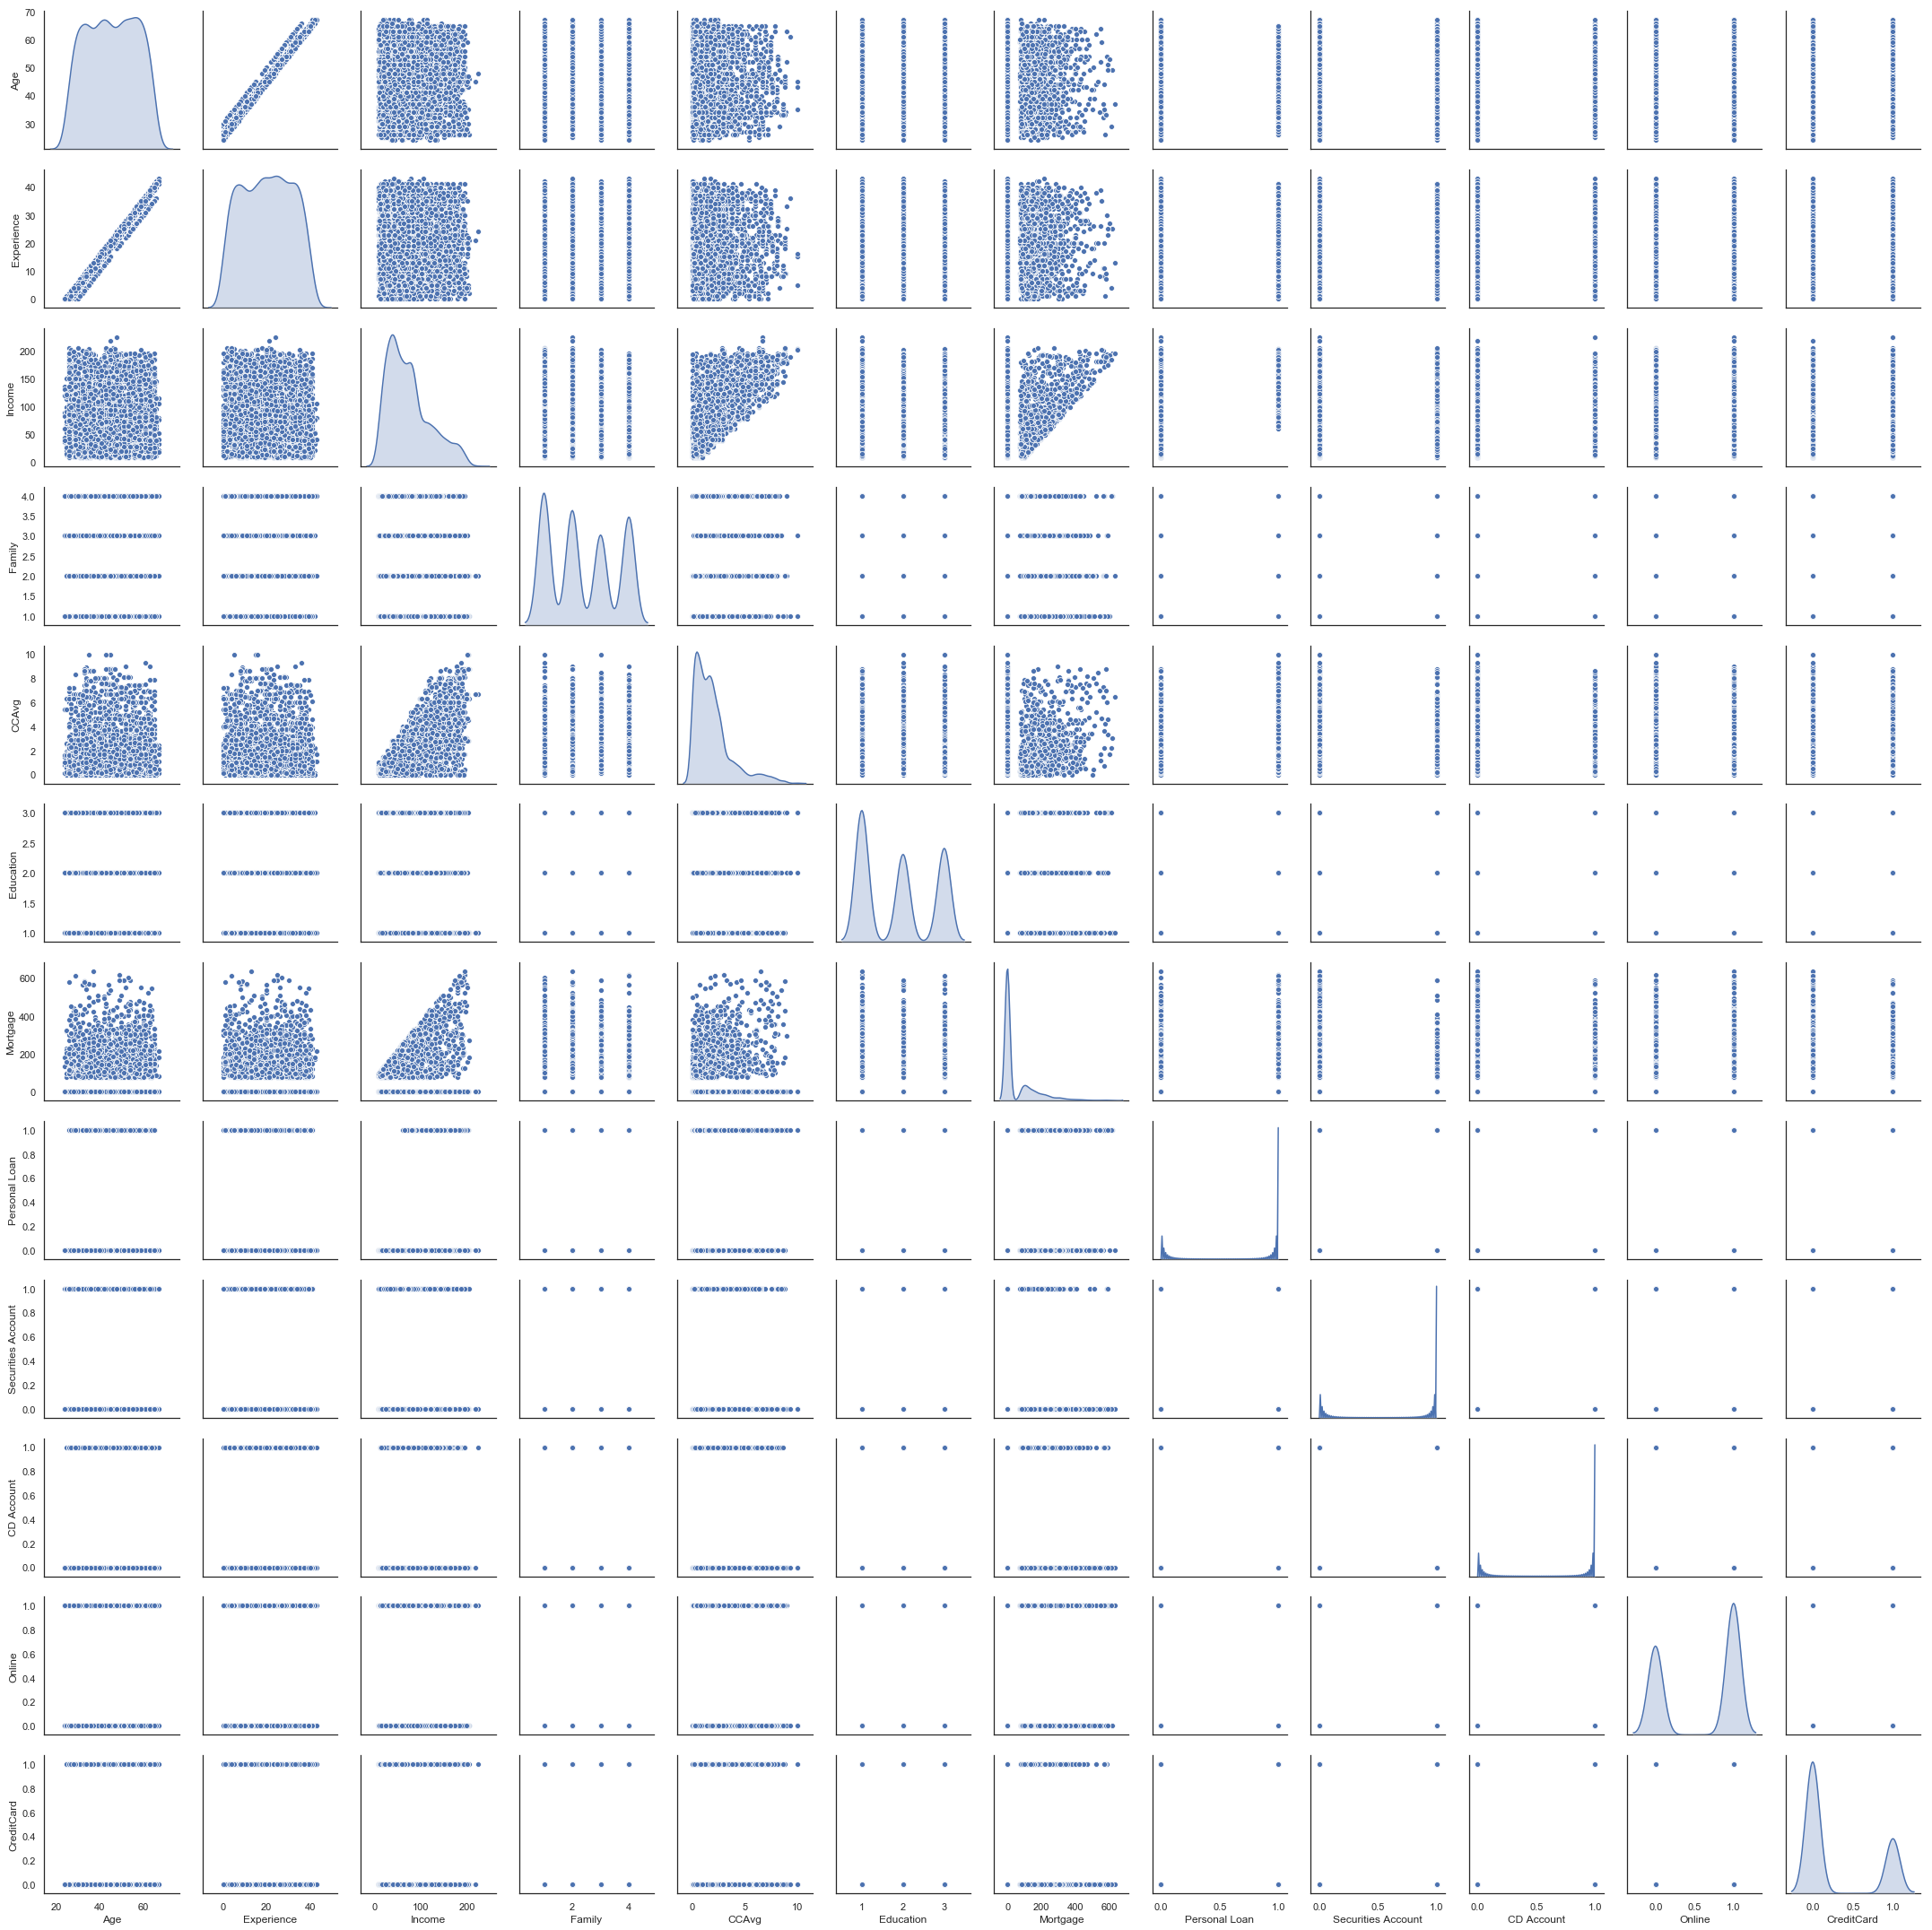

In [588]:
sns.pairplot(bank,diag_kind="kde")

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Age vs Experience</span></p>

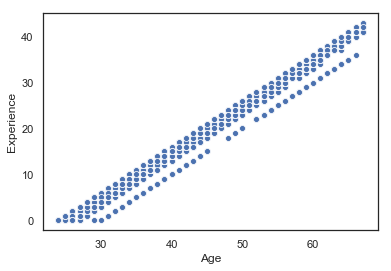

In [589]:
sns.scatterplot(x=bank["Age"],y=bank["Experience"])

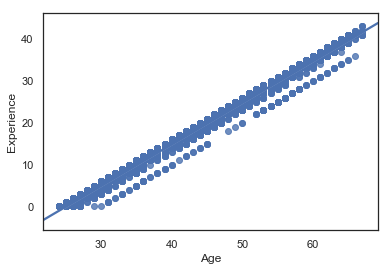

In [492]:
sns.regplot(x=bank["Age"],y=bank["Experience"],fit_reg=True)

**There is clearly positive correlationship between Age and Experience**

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Age vs Income</span></p>

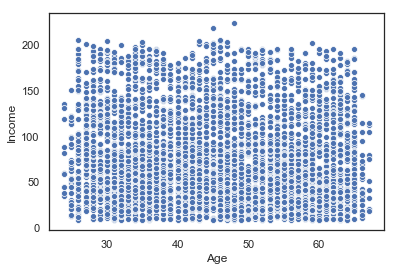

In [493]:
sns.scatterplot(x=bank["Age"],y=bank["Income"])

**No possible relationship identifiable between age and Income**

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Age vs Family</span></p>

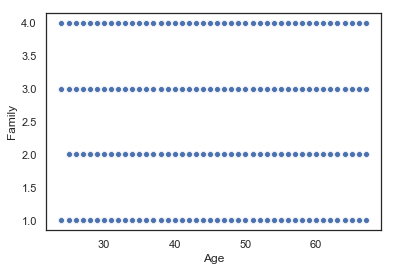

In [494]:
sns.scatterplot(x=bank["Age"],y=bank["Family"])

**No pattern**

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Income vs Mortgage</span></p>

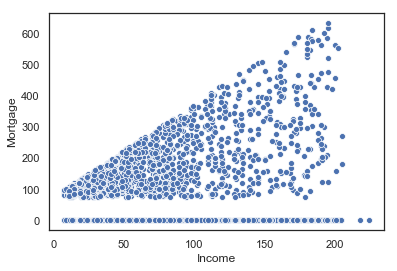

In [495]:
sns.scatterplot(x=bank["Income"],y=bank["Mortgage"])

**The heteroscedicity of the data increases as a function of the Income attribute as clear from the scattterpot.There is clear positive correlation.**

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Age vs Credit Card</span></p>

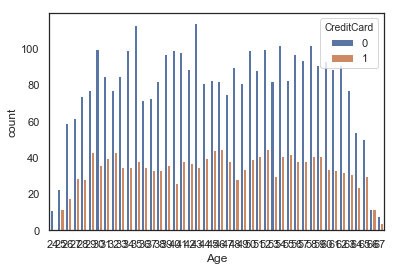

In [590]:
sns.countplot(x=bank["Age"],hue=bank["CreditCard"])

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Age vs Online</span></p>

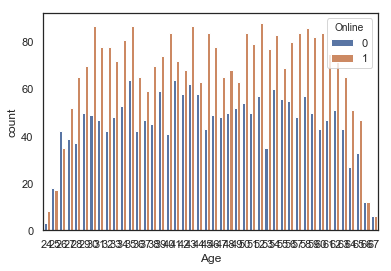

In [497]:
sns.countplot(x=bank["Age"],hue=bank["Online"])

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Age vs CD Account</span></p>

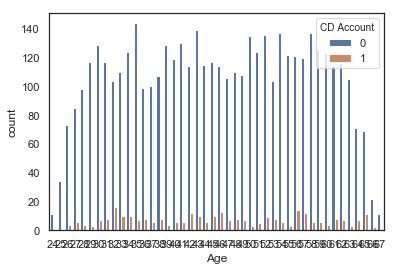

In [498]:
sns.countplot(x=bank["Age"],hue=bank["CD Account"])


<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Education vs Credit Card</span></p>


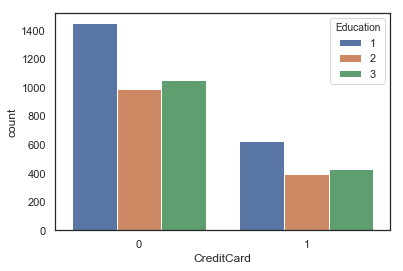

In [499]:
sns.countplot(x=bank["CreditCard"],hue=bank["Education"])

In [500]:
print(bank[(bank["CreditCard"]==1) & (bank["Education"]==1)].count()/bank[(bank["CreditCard"]==0) & (bank["Education"]==1)].count())
print(bank[(bank["CreditCard"]==1) & (bank["Education"]==2)].count()/bank[(bank["CreditCard"]==0) & (bank["Education"]==2)].count())
print(bank[(bank["CreditCard"]==1) & (bank["Education"]==3)].count()/bank[(bank["CreditCard"]==0) & (bank["Education"]==3)].count())

Age                   0.433494
Experience            0.433494
Income                0.433494
Family                0.433494
CCAvg                 0.433494
Education             0.433494
Mortgage              0.433494
Personal Loan         0.433494
Securities Account    0.433494
CD Account            0.433494
Online                0.433494
CreditCard            0.433494
dtype: float64
Age                   0.40101
Experience            0.40101
Income                0.40101
Family                0.40101
CCAvg                 0.40101
Education             0.40101
Mortgage              0.40101
Personal Loan         0.40101
Securities Account    0.40101
CD Account            0.40101
Online                0.40101
CreditCard            0.40101
dtype: float64
Age                   0.407795
Experience            0.407795
Income                0.407795
Family                0.407795
CCAvg                 0.407795
Education             0.407795
Mortgage              0.407795
Personal Loan        

**The ratio of people with credit card is maximum with undergrad people. However no sigificant difference between the three ratios**

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Mortgage vs CCAvg</span></p>

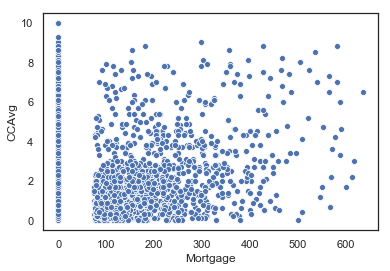

In [501]:
sns.scatterplot(x=bank["Mortgage"],y=bank["CCAvg"])

**The number of people with higher CCAvg and high Mortgage is decreasing**

<p><span style="font-size: 19px; color: rgb(41, 105, 176);">Income vs CCAvg</span></p>

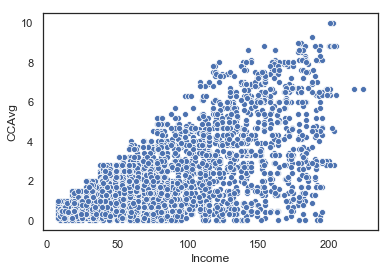

In [502]:
sns.scatterplot(x=bank["Income"],y=bank["CCAvg"])

**Similar to mortgage heteroscadicity of CCavg is increasing with Income.Positive Correlation.**

<p><span style="font-size: 20px; color: rgb(41, 105, 176);">3. Get the target column distribution. Your comments</span></p>

<p><span style="font-family: 'Times New Roman', Times, serif;"></span><span style='color: rgb(40, 50, 78); font-size: 25px; font-family: "Times New Roman", Times, serif;'>Personal Loan</span></p>

**This is our target attribute and we will study its features and correlation with other attributes below.This is a categorical attribute which means that it has two values, either a customer has taken a loan from the bank or he has not.**

480
4468


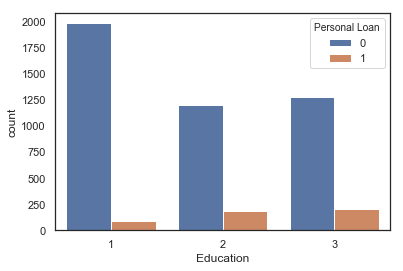

In [503]:
loan=bank[bank["Personal Loan"]==1]
noloan=bank[bank["Personal Loan"]==0]
sns.countplot(x=bank["Education"],hue=bank["Personal Loan"])
print(loan["Age"].count())
print(noloan["Age"].count())

**The higher the education, the more number of people have taken loan.The ratio of people who have taken loan is approx 10%**

Text(0.5, 1.0, 'Age wise distribution of Personal Loan')

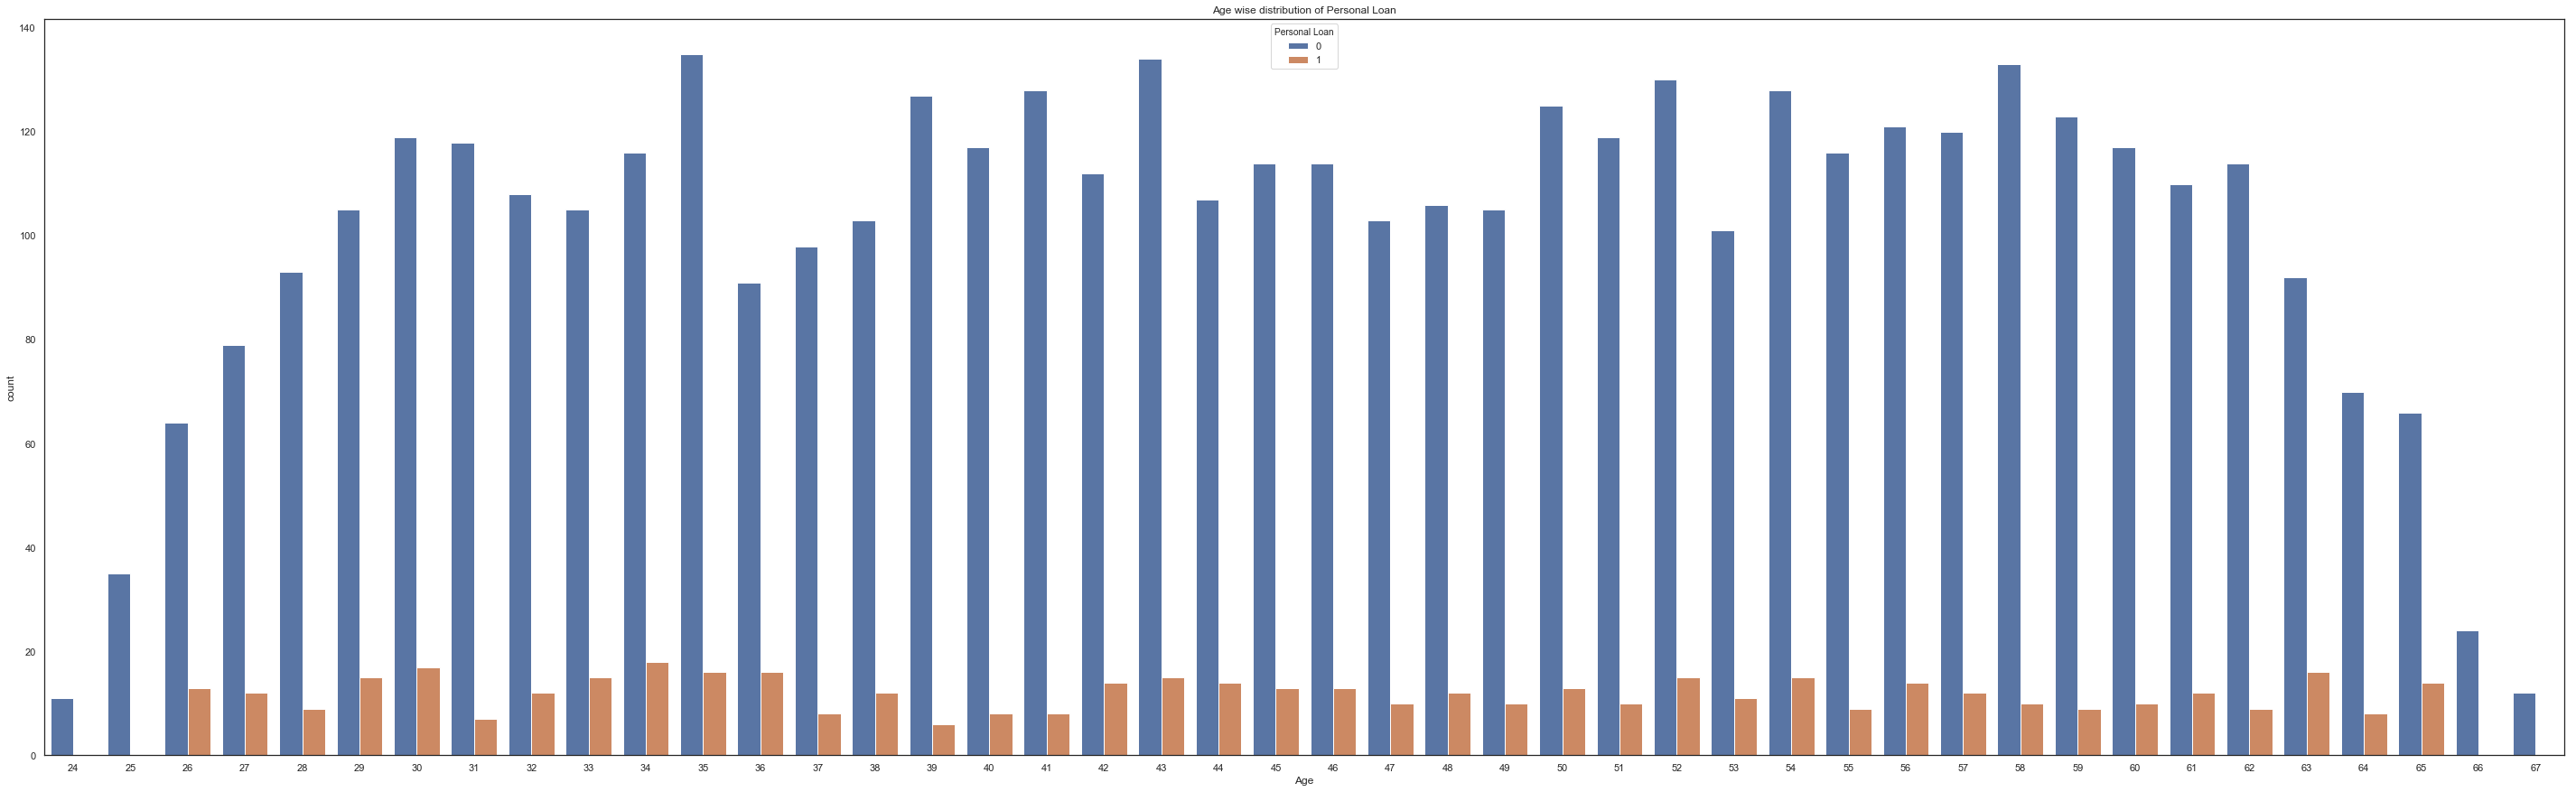

In [591]:
plt.figure(figsize=(50,15))
sns.countplot(x=bank["Age"],hue=bank["Personal Loan"])
plt.title("Age wise distribution of Personal Loan")

In [596]:
print("The minimum age of customers is : ")
print(bank["Age"].min())  #minimum age of customers
print("")
print("The minimum age of customers who have taken loans is : ")
print(loan["Age"].min())  #minimum age of customers who have taken loans

The minimum age of customers is : 
24

The minimum age of customers who have taken loans is : 
26


In [600]:
print("The maximum age of customers is : ")
print(bank["Age"].max()) #maximum age of customers
print("")
print("The maximum age of customers who have taken loans is : ")
print(loan["Age"].max()) #maximum age of people who have taken loans
 #number of people who have not taken loans below age 26 and above age 65
print("")
print(bank[(bank["Personal Loan"]==0) & ((bank["Age"]>65) | (bank["Age"]<26))].count())

The maximum age of customers is : 
67

The maximum age of customers who have taken loans is : 
65

Age                   82
Experience            82
Income                82
Family                82
CCAvg                 82
Education             82
Mortgage              82
Personal Loan         82
Securities Account    82
CD Account            82
Online                82
CreditCard            82
dtype: int64


**The people below the age of 26 and above the age of 65 have not taken loans.**

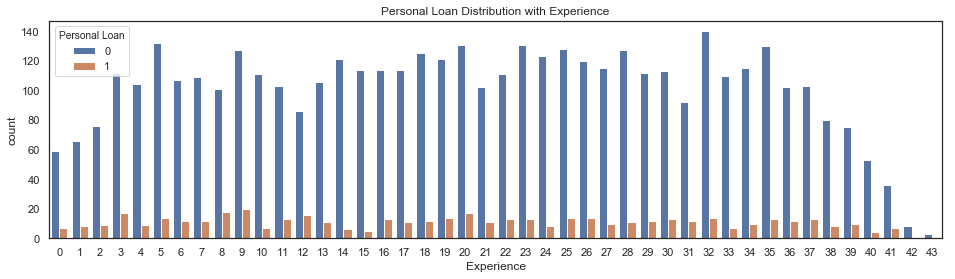

In [608]:
plt.figure(figsize=(16,4))
sns.countplot(x=bank["Experience"],hue=bank["Personal Loan"])
plt.title("Personal Loan Distribution with Experience")
plt.show()

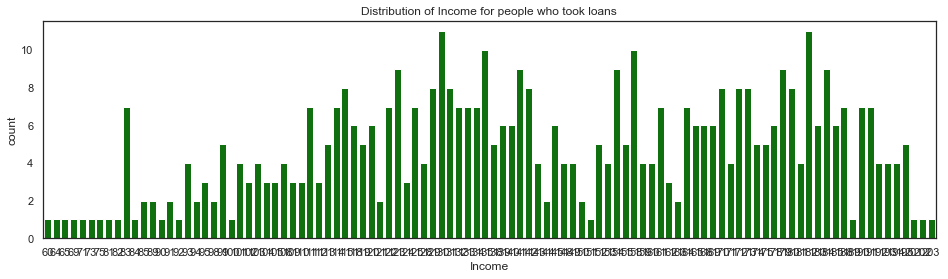

In [615]:
plt.figure(figsize=(16,4))
sns.countplot(x=loan["Income"],color="green")
plt.title("Distribution of Income for people who took loans")
plt.show()

In [509]:
loan["Income"].skew()

-0.2399485607582457

**There is left skewness in the distribution of income of people who have taken loans.**

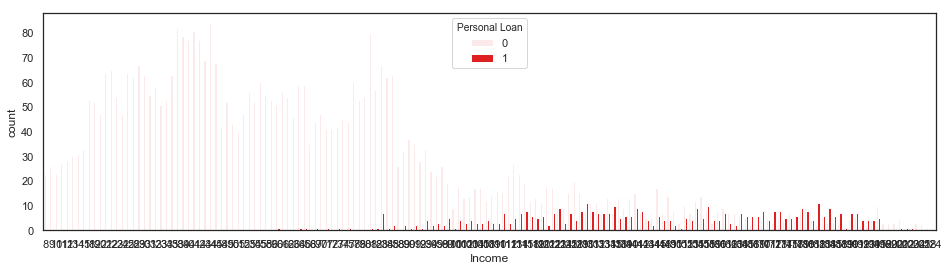

In [616]:
plt.figure(figsize=(16,4))
sns.countplot(x=bank["Income"],hue=bank["Personal Loan"],color="red")
plt.show()

**The people with high income increases probability of taking a loan while people with low income usually are less likely to take loans.**

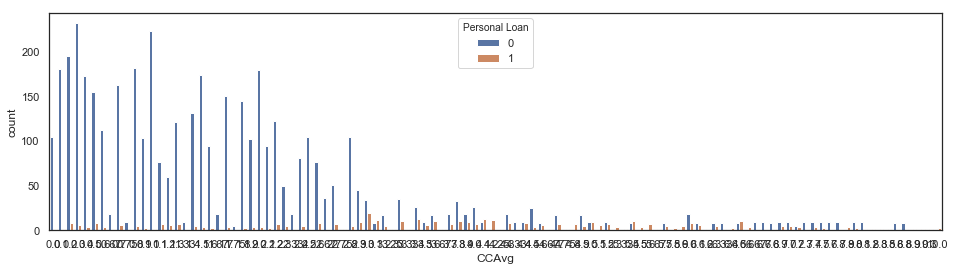

In [511]:
plt.figure(figsize=(16,4))
sns.countplot(x=bank["CCAvg"],hue=bank["Personal Loan"])
plt.show()

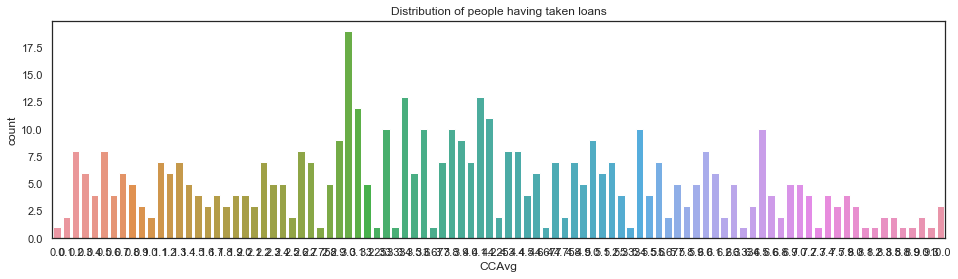

In [618]:
plt.figure(figsize=(16,4))
sns.countplot(x=loan["CCAvg"])
plt.title("Distribution of people having taken loans")
plt.show()

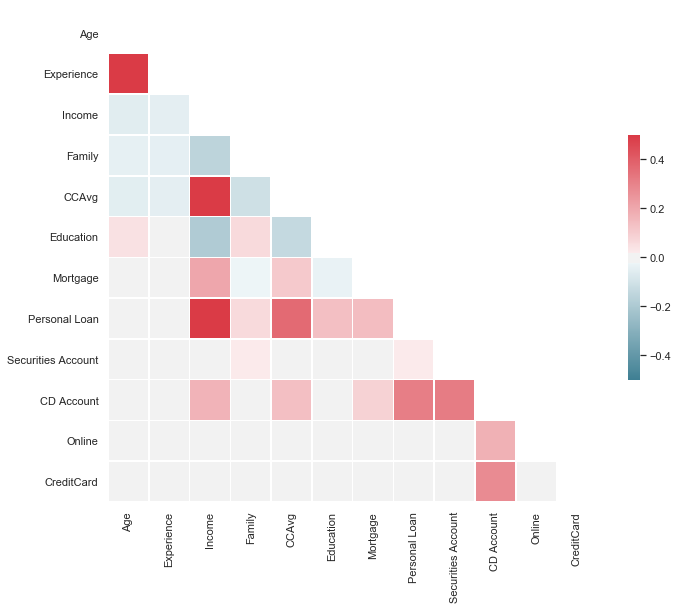

In [513]:
sns.set(style="white")

# Compute the correlation matrix
corr = bank.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5,vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**The above is a sns correlation heatmap between various attributes. As is clear from the map Experience and Age, CD Account and Personal Loan etc. have  positive correlation.**

<p><span style="font-size: 20px; color: rgb(41, 105, 176);">4. Split the data into training and test set in the ratio of 70:30 respectively</span></p>

**Before we split the data we will check the data and preprocess it.**

In [660]:
bank.isnull().values.any() #no null values in the dataset

False

In [661]:
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [662]:
bank.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**The data for categorical values is originally in appropriate format and does not require further processing.**

In [663]:
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [664]:
# Splitting data based on key
# independant variables
X = bank.drop(['Personal Loan'], axis=1)
# the dependent variable
y = bank['Personal Loan']

In [665]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(bank.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(bank.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [666]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12) #70:30 Ratio for data
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2549,41,15,63,1,0.7,3,79,0,0,0,1
3056,54,29,62,4,3.8,2,149,0,0,1,0
4304,64,39,98,3,1.8,2,80,0,0,1,0
3996,50,24,11,4,0.6,3,0,0,0,0,1
2759,59,33,64,3,0.3,2,0,0,0,0,0


In [667]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal Loan'] == 1]), (len(bank.loc[bank['Personal Loan'] == 1])/len(bank.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(bank.loc[bank['Personal Loan'] == 0]), (len(bank.loc[bank['Personal Loan'] == 0])/len(bank.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.70%)
Original Personal Loan False Values   : 4468 (90.30%)

Training Personal Loan True Values    : 328 (9.47%)
Training Personal Loan False Values   : 3135 (90.53%)

Test Personal Loan True Values        : 152 (10.24%)
Test Personal Loan False Values       : 1333 (89.76%)



<p><span style="font-size: 20px; color: rgb(41, 105, 176);">5. Use different classification models (Logistic, K-NN and Naïve Bayes) to
predict the likelihood of a customer buying personal loans </span></p>

# Logistic Regression

In [668]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
logit_model = LogisticRegression(solver="liblinear")
logit_model.fit(X_train, y_train)
#predict on test
y_predict = logit_model.predict(X_test)


coef_df = pd.DataFrame(logit_model.coef_)
coef_df['intercept'] = logit_model.intercept_
print(coef_df)

         0         1         2         3         4         5        6  \
0 -0.40963  0.408205  0.050785  0.714052  0.090131  1.674962  0.00057   

          7         8         9        10  intercept  
0 -0.694501  3.280215 -0.481092 -1.062452  -2.456288  


In [669]:
logit_model_score = logit_model.score(X_test, y_test)
print(logit_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [670]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9555555555555556


# Naive Bayes

In [671]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

In [672]:
bank_model = GaussianNB()
bank_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

***Training data accuracy***

In [673]:
bank_train_predict = bank_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, bank_train_predict)))
print()

Model Accuracy: 0.8822



***Test data accuracy***

In [674]:
bank_test_predict = bank_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, bank_test_predict)))
print()

Model Accuracy: 0.8862



# KNN Classification

In [675]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03,4.948000e+03
mean,-3.275921e-18,-2.073254e-17,-7.813969e-18,1.364219e-17,1.530483e-16,3.519595e-16,2.284169e-16,-3.722882e-16,2.976152e-16,1.019126e-16,1.913497e-16
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-1.904415e+00,-1.797485e+00,-1.427400e+00,-1.211736e+00,-1.107815e+00,-1.046782e+00,-5.562284e-01,-3.412125e-01,-2.549552e-01,-1.217146e+00,-6.454048e-01
25%,-8.443056e-01,-8.470681e-01,-7.550646e-01,-1.211736e+00,-7.072464e-01,-1.046782e+00,-5.562284e-01,-3.412125e-01,-2.549552e-01,-1.217146e+00,-6.454048e-01
50%,3.911848e-02,-2.926778e-02,-2.128586e-01,-3.409054e-01,-2.494542e-01,1.441762e-01,-5.562284e-01,-3.412125e-01,-2.549552e-01,8.215941e-01,-6.454048e-01
75%,8.342002e-01,8.548406e-01,5.245416e-01,5.299257e-01,3.800101e-01,1.335134e+00,4.357318e-01,-3.412125e-01,-2.549552e-01,8.215941e-01,1.549415e+00
max,1.894309e+00,2.004182e+00,3.257260e+00,1.400757e+00,4.614588e+00,1.335134e+00,5.680353e+00,2.930725e+00,3.922258e+00,8.215941e-01,1.549415e+00


In [676]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=12)

In [677]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [678]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [679]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9535353535353536

<p><span style="font-size: 20px; color: rgb(41, 105, 176);">6. Print the confusion matrix for all the above models </span></p>

Confusion Matrix for Logistic Regression


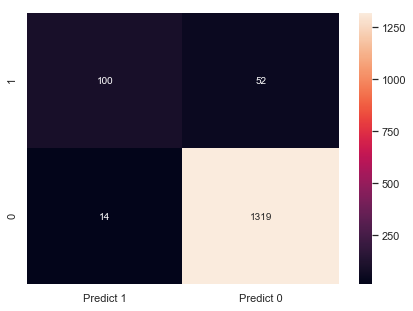

In [680]:
print("Confusion Matrix for Logistic Regression")
cm_LogitR=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm_LogitR, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

Confusion Matrix for Naive Bayes


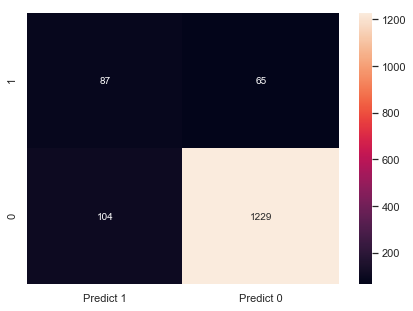

In [681]:
print("Confusion Matrix for Naive Bayes")
cm_NB=metrics.confusion_matrix(y_test, bank_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm_NB, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

Confusion Matrix for KNN Classification


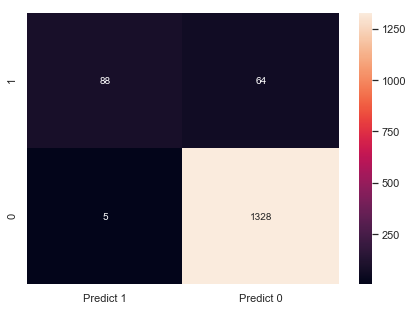

In [682]:
print("Confusion Matrix for KNN Classification")
cm_KNN=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm_KNN, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

<p><span style="font-size: 20px; color: rgb(41, 105, 176);">7. Give your reasoning which is the best model in this case and why it performs better ?  </span></p>

<p><span style='color: rgb(40, 50, 78); font-family: "Times New Roman", Times, serif; font-size: 20px;'>Since the given data set is about the people the bank like to offer loan and the possibility that they would accept this loan.</span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">From the confusion matrix we get the following possibilities:</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">1. Loan was offered and accepted.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">2. Loan was offered but not accepted.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">3. Loan was not offered to someone who would have accepted it.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">4. Loan was not offered who would have anyways rejected it.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">However the bank should focus on minimizing misses ( loans not offered to prospective customers who may have accepted the offer).</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">LR missed 14 , NB missed 104 and KNN missed only 5.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">However we should focus on precision in this case as more correct predictions for prospective customers means more customers.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">We see that LR correctly identified 100 customers( maximum of all three algorithms). So we should choose this algorithm as it performs best( Maximizes customers).</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">KNN identified correctly those customers who would not take a loan but failed to maximize customers.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">Why Logistic Regression is the best in this case ?</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">The logistic regression has the disadvantage that it overestimates the accuracy of its prediction.However it gives more True positives and hence the best model to use for campaign for loan to customers.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;">While KNN more accurately predicts the customers who would or would not take loan , this approach is not beneficial to the bank.</span></span></span></p>
<p><span style="color: rgb(40, 50, 78);"><span style="font-size: 20px;"><span style="font-family: 'Times New Roman', Times, serif;"><br></span></span></span></p>
<p><span style='color: rgb(40, 50, 78); font-family: "Times New Roman", Times, serif; font-size: 20px;'>The Naive Bayes model was least accurate since there were some attributes with high collinearity. The Naive Bayes model compounds the effect of collinearity and causes the model to overfit in training causing low accuracy in prediction.</span></p>

<p><span style="font-size: 20px; color: rgb(41, 105, 176);">--------------------------------------------------------------Thank You--------------------------------------------------------------- </span></p>